# 工具管理器

此示例展示了如何使用 {class}`~matplotlib.backend_managers.ToolManager` 来

* 修改工具栏
* 创建工具
* 添加工具
* 删除工具

/tmp/ipykernel_3913305/2181769870.py:6: UserWarning: Treat the new Tool classes introduced in v1.5 as experimental for now; the API and rcParam may change in future versions.
  plt.rcParams['toolbar'] = 'toolmanager'


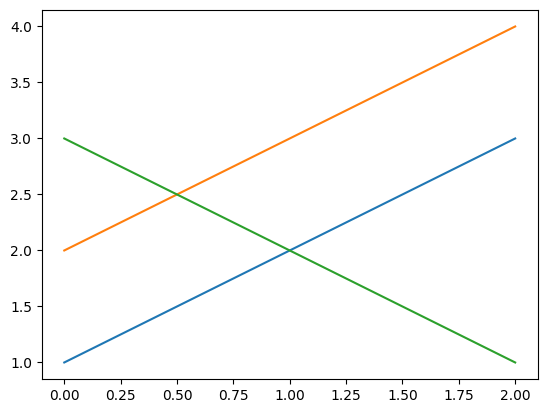

In [1]:
# %matplotlib tk
import matplotlib.pyplot as plt

from matplotlib.backend_tools import ToolBase, ToolToggleBase

plt.rcParams['toolbar'] = 'toolmanager'


class ListTools(ToolBase):
    """List all the tools controlled by the `ToolManager`."""
    default_keymap = 'm'  # keyboard shortcut
    description = 'List Tools'

    def trigger(self, *args, **kwargs):
        print('_' * 80)
        fmt_tool = "{:12} {:45} {}".format
        print(fmt_tool('Name (id)', 'Tool description', 'Keymap'))
        print('-' * 80)
        tools = self.toolmanager.tools
        for name in sorted(tools):
            if not tools[name].description:
                continue
            keys = ', '.join(sorted(self.toolmanager.get_tool_keymap(name)))
            print(fmt_tool(name, tools[name].description, keys))
        print('_' * 80)
        fmt_active_toggle = "{!s:12} {!s:45}".format
        print("Active Toggle tools")
        print(fmt_active_toggle("Group", "Active"))
        print('-' * 80)
        for group, active in self.toolmanager.active_toggle.items():
            print(fmt_active_toggle(group, active))


class GroupHideTool(ToolToggleBase):
    """Show lines with a given gid."""
    default_keymap = 'S'
    description = 'Show by gid'
    default_toggled = True

    def __init__(self, *args, gid, **kwargs):
        self.gid = gid
        super().__init__(*args, **kwargs)

    def enable(self, *args):
        self.set_lines_visibility(True)

    def disable(self, *args):
        self.set_lines_visibility(False)

    def set_lines_visibility(self, state):
        for ax in self.figure.get_axes():
            for line in ax.get_lines():
                if line.get_gid() == self.gid:
                    line.set_visible(state)
        self.figure.canvas.draw()


fig = plt.figure()
plt.plot([1, 2, 3], gid='mygroup')
plt.plot([2, 3, 4], gid='unknown')
plt.plot([3, 2, 1], gid='mygroup')

# Add the custom tools that we created
fig.canvas.manager.toolmanager.add_tool('List', ListTools)
fig.canvas.manager.toolmanager.add_tool('Show', GroupHideTool, gid='mygroup')

# Add an existing tool to new group `foo`.
# It can be added as many times as we want
# fig.canvas.manager.toolbar.add_tool('zoom', 'foo')

# Remove the forward button
fig.canvas.manager.toolmanager.remove_tool('forward')

# To add a custom tool to the toolbar at specific location inside
# the navigation group
# fig.canvas.manager.toolbar.add_tool('Show', 'navigation', 1)

plt.show()